In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle, resample



from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

RND = 12345

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Загрузка датасета

In [2]:

try:
    data = pd.read_excel(r'C:\Users\theli\Downloads\Telegram Desktop\data.xlsx')
except:
    data = pd.read_excel('Путь')

In [3]:
data.head(5)

ID  SEX  CHILD_BOOL  REALTY_BOOL  HAVE_ACCOUNT_BOOL  EMAIL_BOOL  \
0   1    1           0            1                  0           1   
1   2    1           1            1                  0           0   
2   3    1           0            0                  0           1   
3   4    0           0            0                  0           0   
4   5    0           1            0                  0           0   

          DCI  PROFIT_FAMILY  UCI  FOREIGN_PASSPORT_BOOL  SIML  EDUCATION  \
0  14370.2002     14370.2002  0.0                      0    26          3   
1  28312.8594     33312.8594  0.0                      1    19          3   
2  34729.5117     34729.5117  0.0                      0    66          3   
3  28738.4707     28738.4707  0.0                      0    20          3   
4  73310.0000     73310.0000  0.0                      0    25          3   

   TRANSPORT_AMOUNT  target  
0                 1       1  
1                 2       1  
2                 0       1  
3                 0       1  
4                 0       1

In [4]:
data.describe()

ID          SEX   CHILD_BOOL  REALTY_BOOL  HAVE_ACCOUNT_BOOL  \
count  2163.000000  2163.000000  2163.000000  2163.000000        2163.000000   
mean   1081.967638     0.492372     0.516412     0.491447           0.094313   
std     624.494408     0.500057     0.501693     0.500042           0.292332   
min       1.000000     0.000000    -1.000000     0.000000           0.000000   
25%     541.500000     0.000000     0.000000     0.000000           0.000000   
50%    1082.000000     0.000000     1.000000     0.000000           0.000000   
75%    1622.500000     1.000000     1.000000     1.000000           0.000000   
max    2162.000000     1.000000     1.000000     1.000000           1.000000   

        EMAIL_BOOL            DCI  PROFIT_FAMILY            UCI  \
count  2163.000000    2163.000000   2.163000e+03    2163.000000   
mean      0.243181   20564.292780   3.914511e+04    4280.912470   
std       0.429103   31220.805618   8.471056e+04   13969.285081   
min       0.000000       0.000000   0.000000e+00       0.000000   
25%       0.000000    7713.285150   1.615797e+04       0.000000   
50%       0.000000   13485.000000   2.685308e+04       0.000000   
75%       0.000000   23206.075200   4.199500e+04    3440.000000   
max       1.000000  707600.000000   2.699217e+06  300000.000000   

       FOREIGN_PASSPORT_BOOL         SIML    EDUCATION  TRANSPORT_AMOUNT  \
count            2163.000000  2163.000000  2163.000000       2163.000000   
mean                0.152566    49.841424     4.355062          0.234859   
std                 0.359652    58.111000     1.166387          0.459604   
min                 0.000000     0.000000     1.000000          0.000000   
25%                 0.000000    13.000000     3.000000          0.000000   
50%                 0.000000    31.000000     5.000000          0.000000   
75%                 0.000000    60.000000     5.000000          0.000000   
max                 1.000000   397.000000     7.000000          3.000000   

            target  
count  2163.000000  
mean      0.500231  
std       0.500116  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2163 non-null   int64  
 1   SEX                    2163 non-null   int64  
 2   CHILD_BOOL             2163 non-null   int64  
 3   REALTY_BOOL            2163 non-null   int64  
 4   HAVE_ACCOUNT_BOOL      2163 non-null   int64  
 5   EMAIL_BOOL             2163 non-null   int64  
 6   DCI                    2163 non-null   float64
 7   PROFIT_FAMILY          2163 non-null   float64
 8   UCI                    2163 non-null   float64
 9   FOREIGN_PASSPORT_BOOL  2163 non-null   int64  
 10  SIML                   2163 non-null   int64  
 11  EDUCATION              2163 non-null   int64  
 12  TRANSPORT_AMOUNT       2163 non-null   int64  
 13  target                 2163 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 236.7 KB


In [6]:
data.isna().sum()

ID                       0
SEX                      0
CHILD_BOOL               0
REALTY_BOOL              0
HAVE_ACCOUNT_BOOL        0
EMAIL_BOOL               0
DCI                      0
PROFIT_FAMILY            0
UCI                      0
FOREIGN_PASSPORT_BOOL    0
SIML                     0
EDUCATION                0
TRANSPORT_AMOUNT         0
target                   0
dtype: int64

Пропусков нет

## Кореляция

In [7]:
X_df = pd.DataFrame(data, columns=data.columns)

correlation_matrix = X_df.corr()

# Сorrelation matrix
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Считаем VIF показатель, на все, что выше 5 нужно обратить внимание
vif = pd.DataFrame()
vif["Feature"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]


vif

Feature        VIF
0                      ID   7.796638
1                     SEX   2.255504
2              CHILD_BOOL   2.188014
3             REALTY_BOOL   2.027716
4       HAVE_ACCOUNT_BOOL   1.191335
5              EMAIL_BOOL   1.495081
6                     DCI   2.043137
7           PROFIT_FAMILY   1.537284
8                     UCI   1.209412
9   FOREIGN_PASSPORT_BOOL   1.415666
10                   SIML   1.910071
11              EDUCATION  13.323656
12       TRANSPORT_AMOUNT   1.510224
13                 target   4.742884

**Вывод** VIF скор больше 5, означает что в колонке EDUCATION мультиколленирность:
* можно попробовать feature engeeniring
* удалить
* Регулизация Ridge

### Балланс классов

In [8]:
round(data['target'].value_counts(normalize=True) * 100, 2)

1    50.02
0    49.98
Name: target, dtype: float64

**Вывод** Классы сбалансированы, можно использовать метрику Accuracy

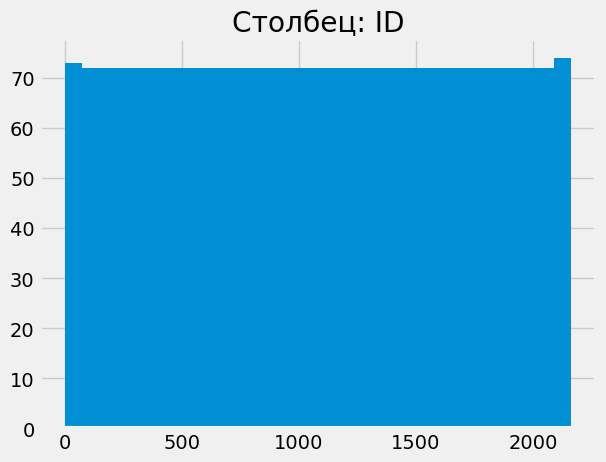

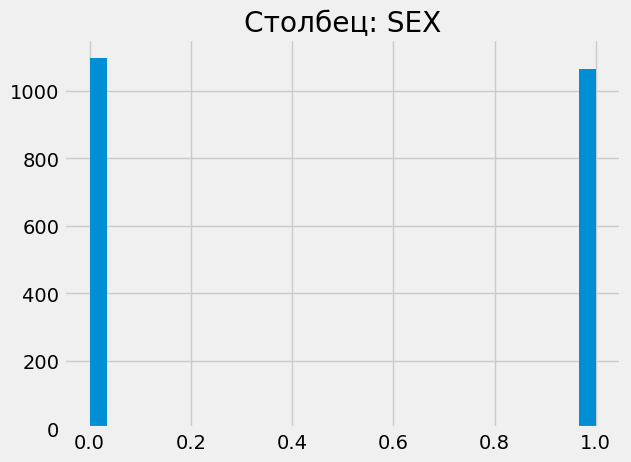

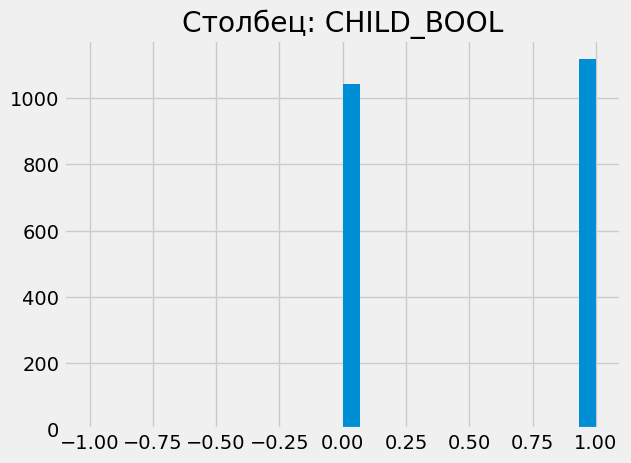

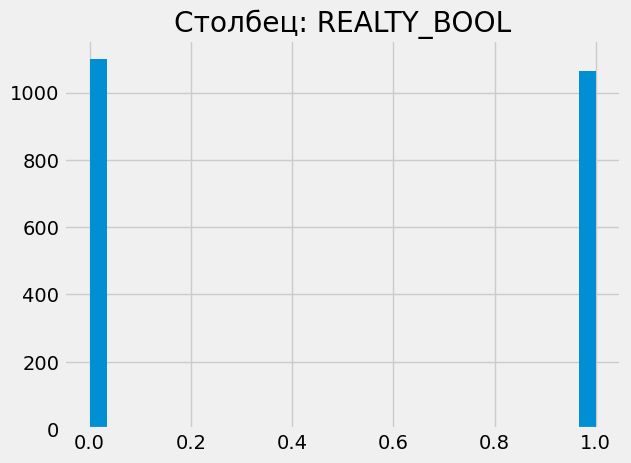

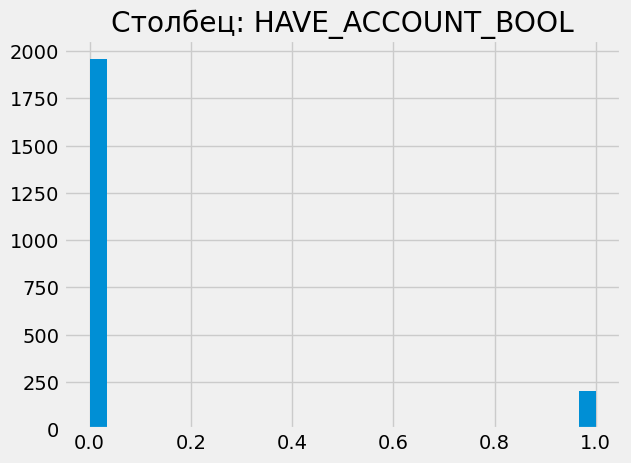

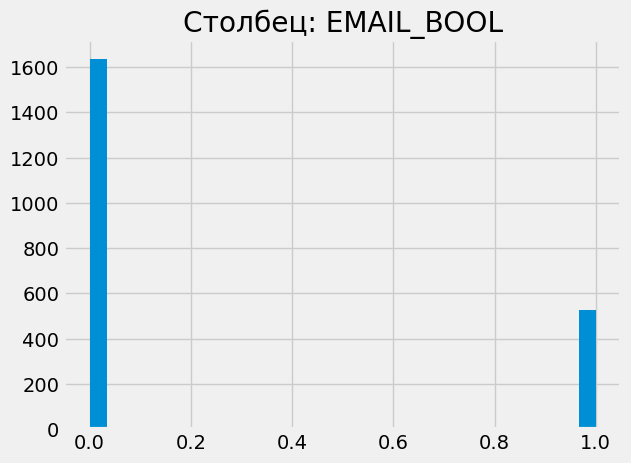

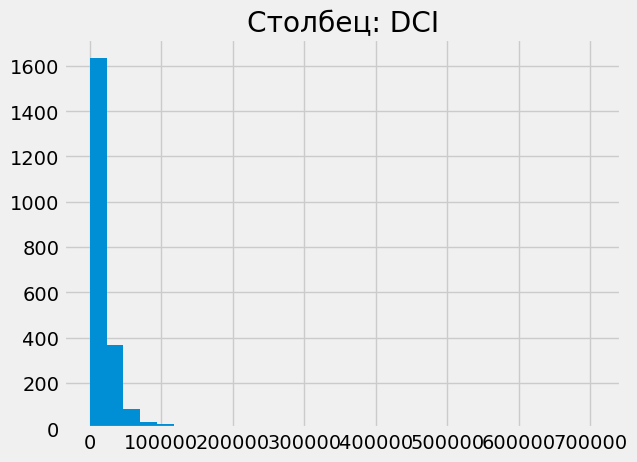

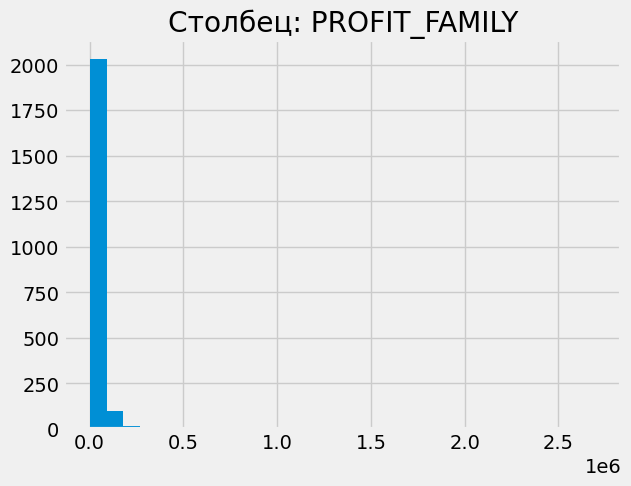

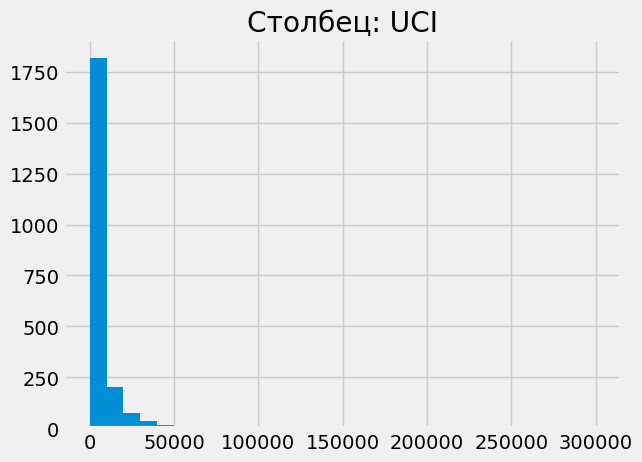

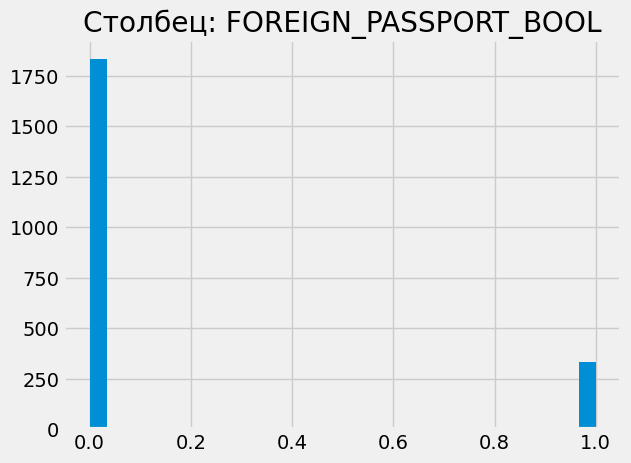

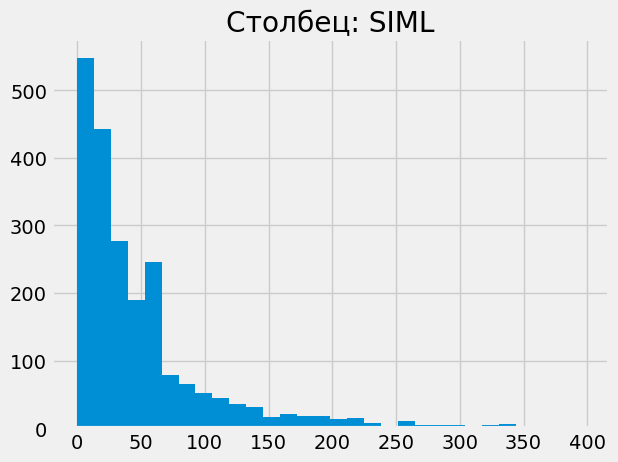

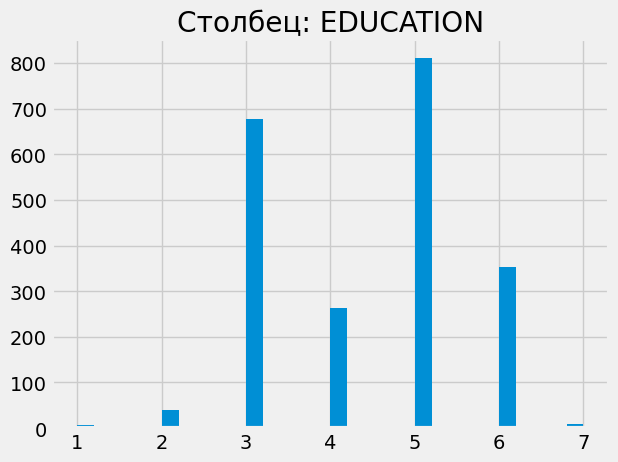

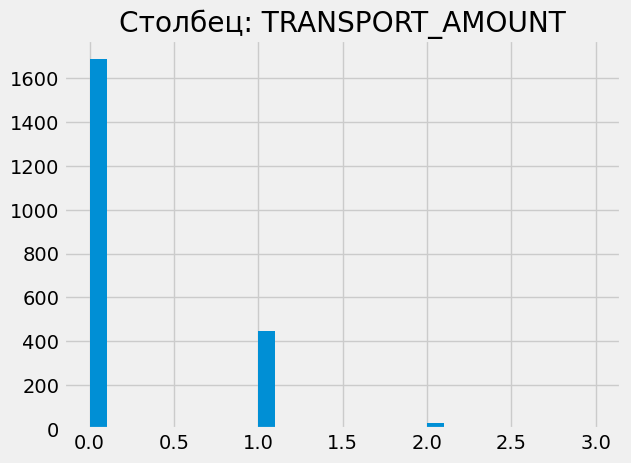

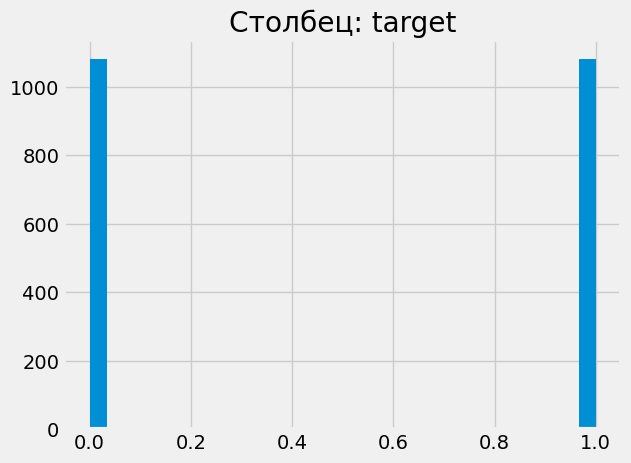

In [9]:
for col in data.columns:
    plt.hist(data[col], bins=30)
    plt.title(f'Столбец: {col}')
    plt.show()

## Удаление выбрасов

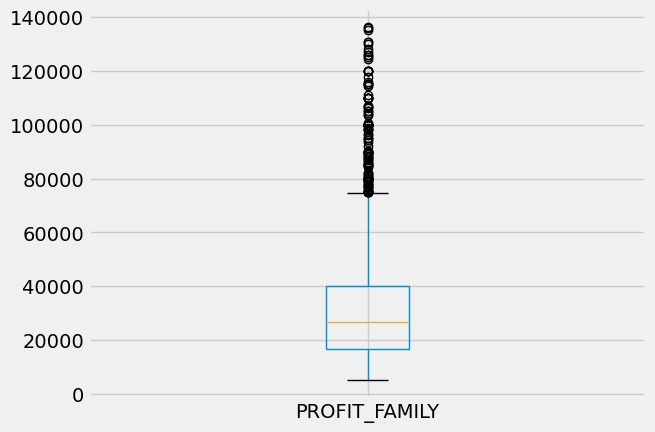

In [10]:
Q1 =  data['PROFIT_FAMILY'].quantile(0.025)
Q3 = data['PROFIT_FAMILY'].quantile(0.975)
IQR = Q3 - Q1
data = data[(data['PROFIT_FAMILY'] > Q1) & (data['PROFIT_FAMILY'] < Q3)]


data.boxplot(column="PROFIT_FAMILY")
plt.show()

In [11]:
# формула для просмотра ecdf распределния
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Количество точет в datа: n
    n = len(data)
    # x-data
    x = np.sort(data)
    # y-data 
    y = np.arange(1, len(x)+1) / n
    return x, y

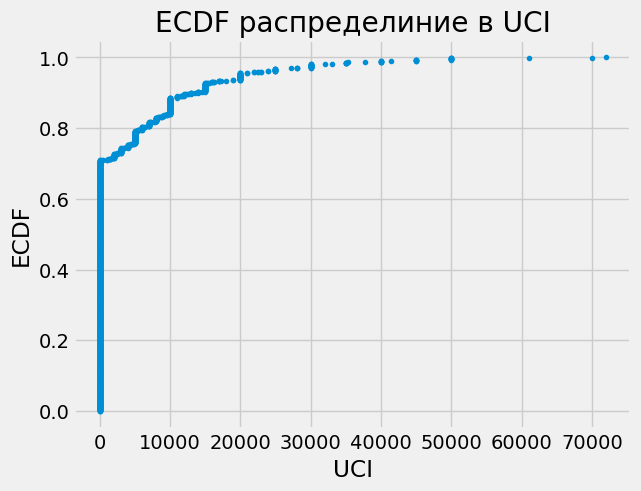

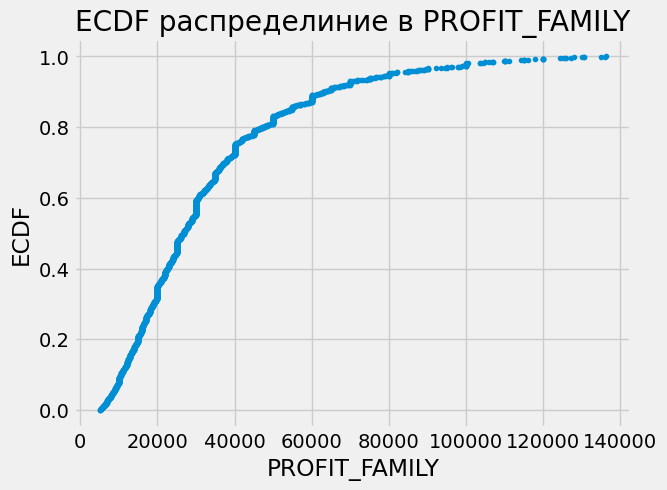

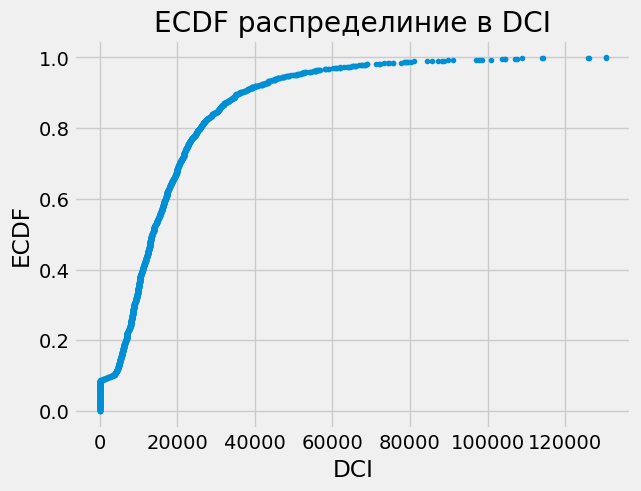

In [12]:
ecdf_col = ['UCI', 'PROFIT_FAMILY', 'DCI']
for col in ecdf_col:
    x_month, y_month = ecdf(data[col]) 
    plt.plot(x_month, y_month, marker='.', linestyle='none') 
    plt.xlabel(f'{col}')
    plt.ylabel('ECDF')
    plt.title(f'ECDF распределиние в {col}')
    plt.show()

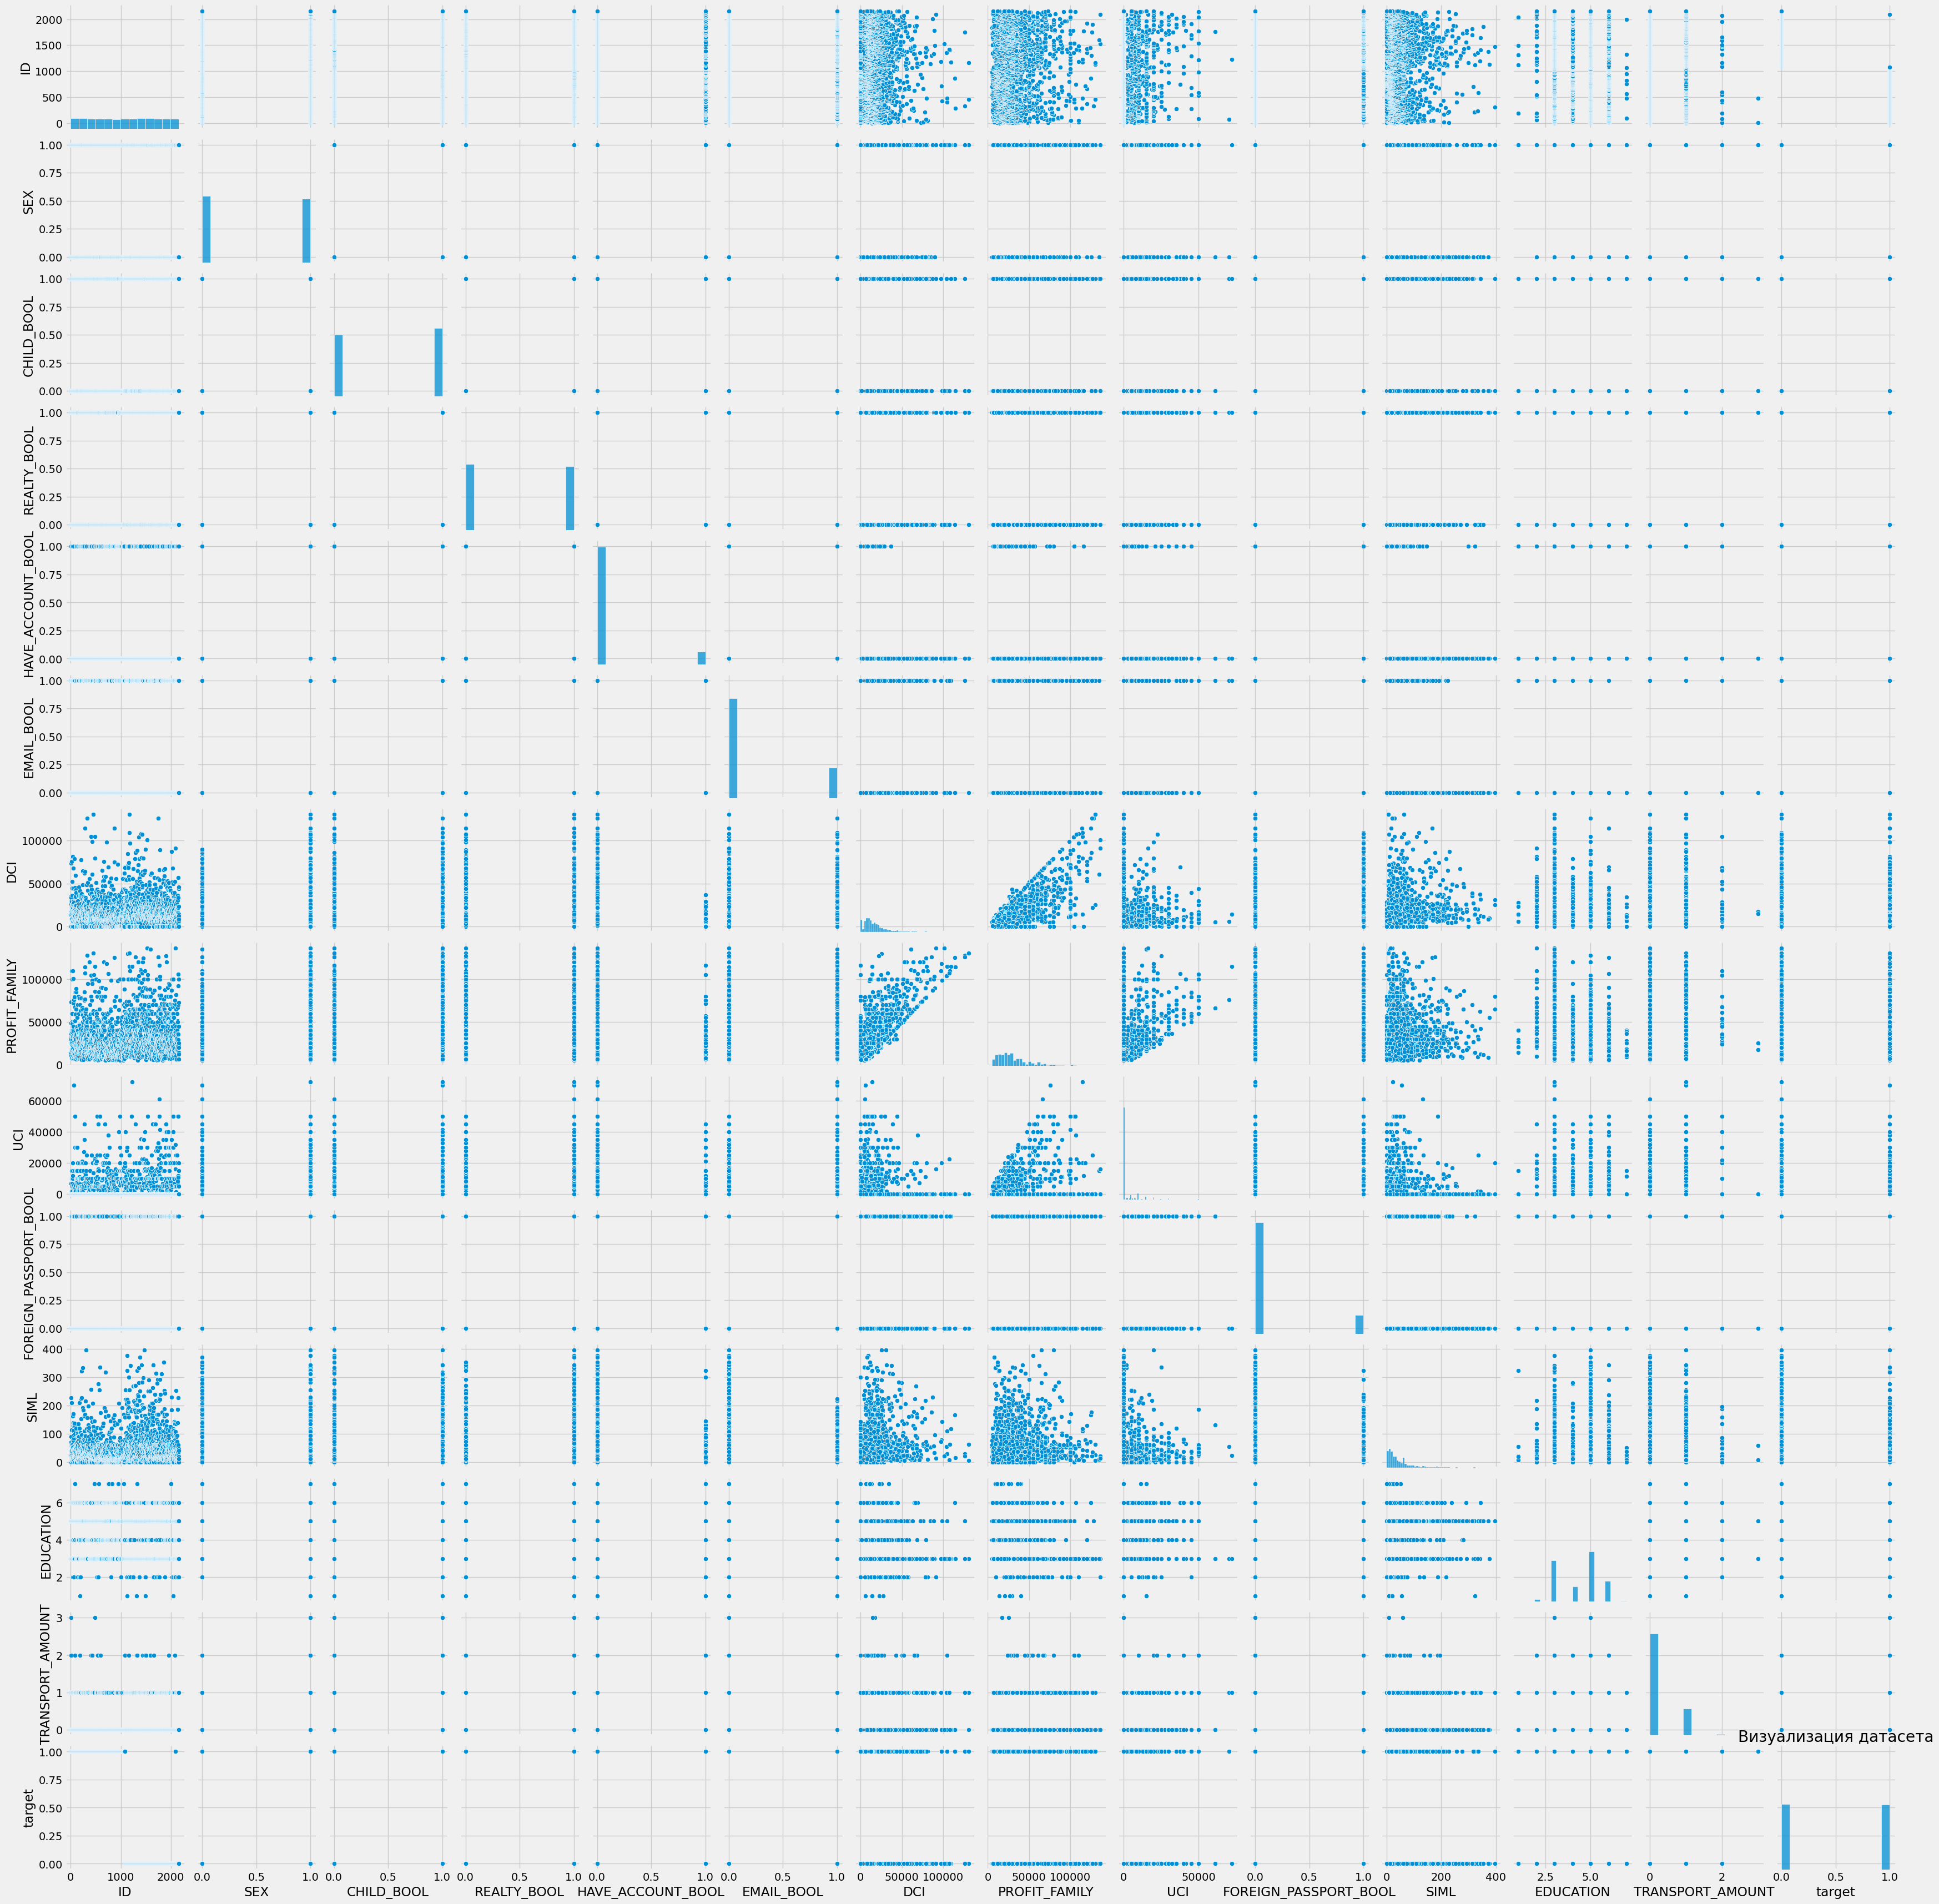

In [13]:
sns.pairplot(data)
plt.title('Визуализация датасета')
plt.show()

## Категоризация

In [14]:
def categorize_income(income):
    try:
        if 0 <= income <= 25000:
            return 'E'
        elif 25001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 100000:
            return 'C'
        elif 100001 <= income <= 120000:
            return 'B'
        elif income >= 120000:
            return 'A'
    except:
        pass

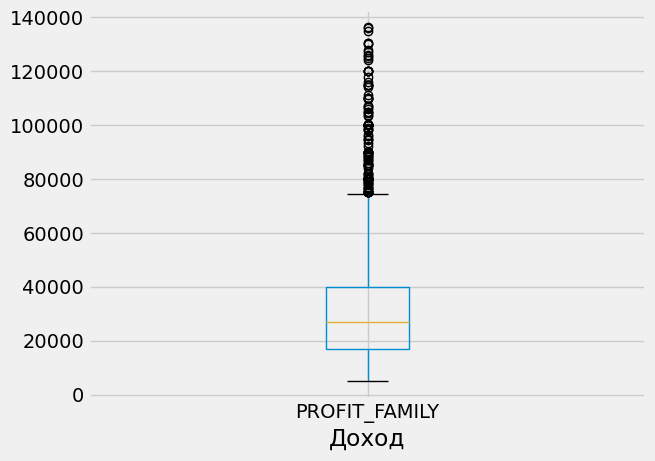

In [15]:
data.boxplot(column="PROFIT_FAMILY")
plt.xlabel('Доход')
plt.show()

In [16]:
data['salary_bucket_category'] = data['PROFIT_FAMILY'].apply(categorize_income)

In [17]:
client_class = data['salary_bucket_category'].value_counts(normalize=True)
round(client_class * 100, 2)

E    47.25
D    35.90
C    14.86
B     1.41
A     0.58
Name: salary_bucket_category, dtype: float64

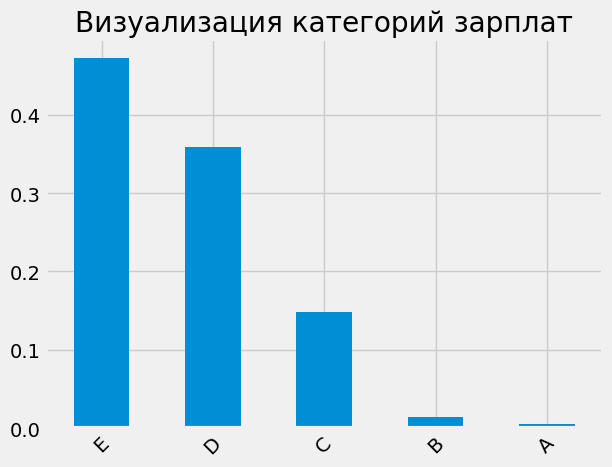

In [18]:
client_class.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Визуализация категорий зарплат')
plt.show()

### Удаляем не релевантные признаки

In [19]:
data.columns

Index(['ID', 'SEX', 'CHILD_BOOL', 'REALTY_BOOL', 'HAVE_ACCOUNT_BOOL',
       'EMAIL_BOOL', 'DCI', 'PROFIT_FAMILY', 'UCI', 'FOREIGN_PASSPORT_BOOL',
       'SIML', 'EDUCATION', 'TRANSPORT_AMOUNT', 'target',
       'salary_bucket_category'],
      dtype='object')

In [20]:
data = data.drop('ID', axis=1)

In [21]:
target = data['target']
features = data.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RND)


print('Размер обучающей выборки - {}' .format(X_train.shape)) 
print('Размер валидоционной выборки - {}' .format(X_test.shape)) 

Размер обучающей выборки - (1437, 13)
Размер валидоционной выборки - (616, 13)


In [22]:
# разделяем числовые колонки и категориальные
numerical_features = ['SEX', 'CHILD_BOOL', 'REALTY_BOOL', 'HAVE_ACCOUNT_BOOL',
       'EMAIL_BOOL', 'DCI', 'PROFIT_FAMILY', 'UCI', 'FOREIGN_PASSPORT_BOOL',
       'SIML', 'EDUCATION', 'TRANSPORT_AMOUNT']

categorical_features = ['salary_bucket_category']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
# Создаем pipeline для LogisticRegression
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=RND))
])


# Создаем pipeline для RandomForestClassifier
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=RND))
])

pipe_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(random_state=RND))
])

# Создаем pipeline для RandomForestClassifier 
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=RND))
])

# Создаем pipeline для Knn 
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Создаем pipeline для GB
pipe_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

In [23]:
rf_score = pipe_rf.fit(X_train, y_train).score(X_test, y_test)
predicted_valid_rf = pipe_rf.predict(X_test)


print("F1 Случайный лес:", f1_score(y_test, predicted_valid_rf))
print(f'ROC-AUC score {roc_auc_score(y_test, predicted_valid_rf)}')
print(f'Accuracy {accuracy_score(y_test, predicted_valid_rf)}')
print("Precision:", precision_score(y_test, predicted_valid_rf))
print("Recall:", recall_score(y_test, predicted_valid_rf))

F1 Случайный лес: 0.6084142394822006
ROC-AUC score 0.6072501818871984
Accuracy 0.6071428571428571
Precision: 0.6163934426229508
Recall: 0.6006389776357828


In [24]:
model = pipe.fit(X_train, y_train)
predicted_valid_lr = pipe.predict(X_test)
print("F1 Логистческая регрессия:", f1_score(y_test, predicted_valid_lr))
# Bassline model metrics: accuracy, precision, recall scores, AUC
print("Accuracy:", accuracy_score(y_test, predicted_valid_lr))
print("Precision:", precision_score(y_test, predicted_valid_lr))
print("Recall:", recall_score(y_test, predicted_valid_lr))
print(f'ROC-AUC score {roc_auc_score(y_test, predicted_valid_lr)}')

F1 Логистческая регрессия: 0.6808510638297872
Accuracy: 0.6590909090909091
Precision: 0.6492753623188405
Recall: 0.7156549520766773
ROC-AUC score 0.6581575090416389


In [25]:
pipe_svm.fit(X_train, y_train)
pred_svm =  pipe_svm.predict(X_test)

print("F1 Логистческая регрессия:", f1_score(y_test, pred_svm))
# Bassline model metrics: accuracy, precision, recall scores, AUC
print("Accuracy:", accuracy_score(y_test, pred_svm))
print("Precision:", precision_score(y_test, pred_svm))
print("Recall:", recall_score(y_test, pred_svm))
print(f'ROC-AUC score {roc_auc_score(y_test, pred_svm)}')

F1 Логистческая регрессия: 0.6604938271604939
Accuracy: 0.6428571428571429
Precision: 0.6388059701492538
Recall: 0.6837060702875399
ROC-AUC score 0.6421830681470703


In [26]:
pipe_knn.fit(X_train, y_train)
pred_knn = pipe_knn.predict(X_test)

# Bassline model metrics: F1, acuracy, precision, recall scores, AUC
print("F1 Логистческая регрессия:", f1_score(y_test, pred_knn))
print("Accuracy:", accuracy_score(y_test, pred_knn))
print("Precision:", precision_score(y_test, pred_knn))
print("Recall:", recall_score(y_test, pred_knn))
print(f'ROC-AUC score {roc_auc_score(y_test, pred_knn)}')

F1 Логистческая регрессия: 0.6052631578947368
Accuracy: 0.6103896103896104
Precision: 0.6237288135593221
Recall: 0.5878594249201278
ROC-AUC score 0.6107613956283807


In [27]:
dt_score = pipe_dt.fit(X_train, y_train).score(X_test, y_test) # используем метод score из библиотеки sklearn
predicted_valid_dt = pipe_dt.predict(X_test)

print("F1 Дерево решений:", f1_score(y_test, predicted_valid_dt)) # находим метрику F1
print("Accuracy:", accuracy_score(y_test, predicted_valid_dt))
print("Precision:", precision_score(y_test, predicted_valid_dt))
print("Recall:", recall_score(y_test, predicted_valid_dt))
print(f'ROC-AUC score {roc_auc_score(y_test, predicted_valid_dt)}')

F1 Дерево решений: 0.5714285714285715
Accuracy: 0.5568181818181818
Precision: 0.5617283950617284
Recall: 0.5814696485623003
ROC-AUC score 0.5564113919379159


In [28]:
pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_test)

print("F1 Дерево решений:", f1_score(y_test, pred_gb)) # находим метрику F1
print("Accuracy:", accuracy_score(y_test, pred_gb))
print("Precision:", precision_score(y_test, pred_gb))
print("Recall:", recall_score(y_test, pred_gb))
print(f'ROC-AUC score {roc_auc_score(y_test, pred_gb)}')

F1 Дерево решений: 0.6350710900473934
Accuracy: 0.625
Precision: 0.628125
Recall: 0.6421725239616614
ROC-AUC score 0.6247166250171343


In [29]:
baseline_results = pd.DataFrame({'Models':['DT', 'LR', 'GB', 'RF', 'KNN', 'SVM'],
                                 'Acc' :[accuracy_score(y_test, predicted_valid_dt),
                                         accuracy_score(y_test, predicted_valid_lr),
                                         accuracy_score(y_test, pred_gb),
                                         accuracy_score(y_test, predicted_valid_rf),
                                         accuracy_score(y_test, pred_knn),
                                         accuracy_score(y_test, pred_svm)
                                 ]
                                })

baseline_results = baseline_results.sort_values('Acc', ascending=False)
baseline_results

Models       Acc
1     LR  0.659091
5    SVM  0.642857
2     GB  0.625000
4    KNN  0.610390
3     RF  0.607143
0     DT  0.556818

In [30]:
colors = ['red', 'green', 'blue', 'yellow', 'purpule', 'black']
fig = px.bar(baseline_results, 'Models', 'Acc', color=colors,title='Baseline модели с метрикой Accuracy')
fig.show()

**Вывод**: Лучшая метрика accuracy у логистической регрессии, но рядом SVM и GB

## Presion/Recall если требуется для задачи

In [31]:
 y_proba = pipe.predict_proba(X_test)[:, 1] 

# threshold 
custom_threshold = 0.5
y_custom_pred = (y_proba >= custom_threshold).astype(int)

precision = precision_score(y_test, y_custom_pred)
recall = recall_score(y_test, y_custom_pred)

print(f"Precision с установленным threshold: {precision:.4f}")
print(f"Recall с установленным threshold: {recall:.4f}")

Precision с установленным threshold: 0.6493
Recall с установленным threshold: 0.7157


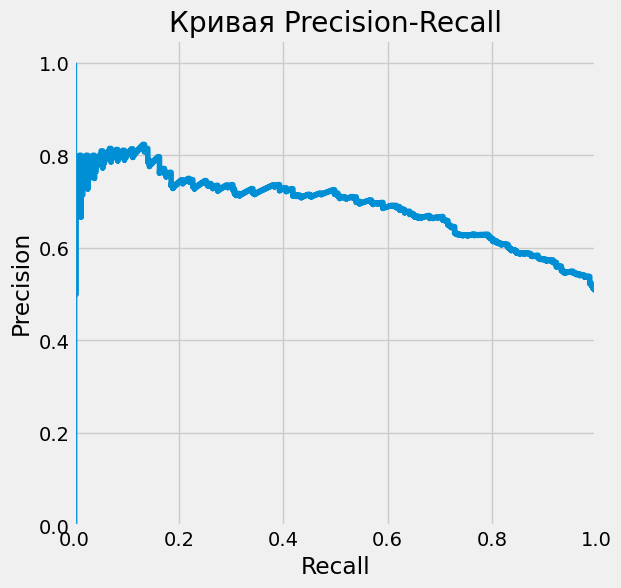

In [32]:
probabilities_test = pipe.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

In [33]:
probabilities_valid = pipe.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(y_test, predicted_valid)  
    recall = recall_score(y_test, predicted_valid) 

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

Порог = 0.00 | Точность = 0.508, Полнота = 1.000
Порог = 0.02 | Точность = 0.508, Полнота = 1.000
Порог = 0.04 | Точность = 0.508, Полнота = 1.000
Порог = 0.06 | Точность = 0.509, Полнота = 0.997
Порог = 0.08 | Точность = 0.509, Полнота = 0.997
Порог = 0.10 | Точность = 0.510, Полнота = 0.997
Порог = 0.12 | Точность = 0.515, Полнота = 0.994
Порог = 0.14 | Точность = 0.519, Полнота = 0.990
Порог = 0.16 | Точность = 0.523, Полнота = 0.987
Порог = 0.18 | Точность = 0.527, Полнота = 0.987
Порог = 0.20 | Точность = 0.536, Полнота = 0.987
Порог = 0.22 | Точность = 0.539, Полнота = 0.978
Порог = 0.24 | Точность = 0.543, Полнота = 0.965
Порог = 0.26 | Точность = 0.548, Полнота = 0.949
Порог = 0.28 | Точность = 0.552, Полнота = 0.936
Порог = 0.30 | Точность = 0.560, Полнота = 0.933
Порог = 0.32 | Точность = 0.572, Полнота = 0.917
Порог = 0.34 | Точность = 0.574, Полнота = 0.901
Порог = 0.36 | Точность = 0.586, Полнота = 0.872
Порог = 0.38 | Точность = 0.589, Полнота = 0.853
Порог = 0.40 | Точно

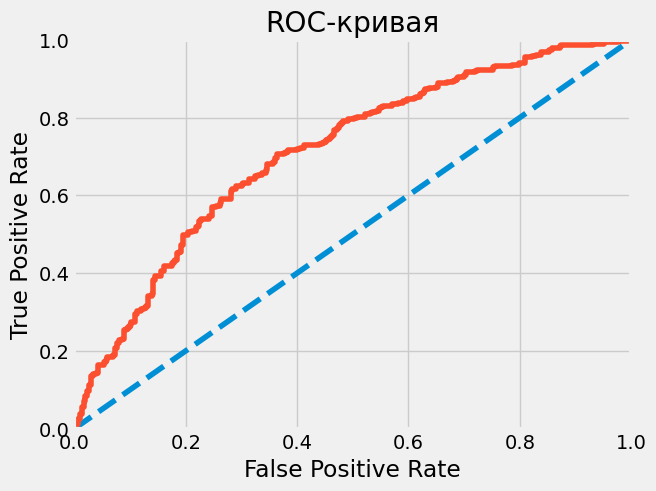

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)                

plt.figure()


# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC-кривая")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


plt.show()

## Подбор гиперпарамтров

**Так как выявили мультиколлениарность, в колонке EDUCATION удалим ее**


In [35]:
data.head(5)

SEX  CHILD_BOOL  REALTY_BOOL  HAVE_ACCOUNT_BOOL  EMAIL_BOOL         DCI  \
0    1           0            1                  0           1  14370.2002   
1    1           1            1                  0           0  28312.8594   
2    1           0            0                  0           1  34729.5117   
3    0           0            0                  0           0  28738.4707   
4    0           1            0                  0           0  73310.0000   

   PROFIT_FAMILY  UCI  FOREIGN_PASSPORT_BOOL  SIML  EDUCATION  \
0     14370.2002  0.0                      0    26          3   
1     33312.8594  0.0                      1    19          3   
2     34729.5117  0.0                      0    66          3   
3     28738.4707  0.0                      0    20          3   
4     73310.0000  0.0                      0    25          3   

   TRANSPORT_AMOUNT  target salary_bucket_category  
0                 1       1                      E  
1                 2       1                      D  
2                 0       1                      D  
3                 0       1                      D  
4                 0       1                      C

In [36]:
target = data['target']
features = data.drop(['target', 'EDUCATION'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RND)


In [37]:
numerical_features = X_train.select_dtypes(include=["number"]).columns
categorical_features = X_train.select_dtypes(exclude=["number"]).columns


numerical_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"  
)

## Подбор гиперпараметров

In [38]:
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=RND))
])

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['SEX', 'CHILD_BOOL', 'REALTY_BOOL', 'HAVE_ACCOUNT_BOOL', 'EMAIL_BOOL',
       'DCI', 'PROFIT_FAMILY', 'UCI', 'FOREIGN_PASSPORT_BOOL', 'SIML',
       'TRANSPORT_AMOUNT'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['salary_bucket_category'], dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(random_state=12345,
                                                           solver='liblinear'))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [40]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_params

{'classifier__C': 0.01, 'classifier__penalty': 'l2'}

In [41]:
accuracy = best_estimator.score(X_test, y_test)
accuracy

0.672077922077922

In [42]:
final = pd.DataFrame({'Model':['Baseline of LR', 'GridSearch LR'],
                      'Acc' :[accuracy_score(y_test, predicted_valid_lr),
                          accuracy
                      ]
                     })

fig = px.bar(final, 'Model', 'Acc', color=['Red', 'Yellow'], title='Результаты')
fig.show()

**Вывод** Улучшили модель на пару процентов, но чтобы улучшить модель еще, можно:

* Используйте более сложные модели: Попробуйте более сложные алгоритмы машинного обучения, такие как градиентный бустинг LightGBM или ансамбли. Эти модели могут захватывать более сложные зависимости в данных.


* Инженерия признаков: Проанализировать, можно ли создать новые признаки, которые были бы информативными для задачи классификации оттока. Это может быть агрегация данных и создание категориальных признаков.

* Оптимизация гиперпараметров

* Анализ ошибок: Изучить ошибки, которые делает модель, чтобы понять, в каких случаях она плохо справляется. Это может идентифицировать области для улучшения признаков или модели.

* Взаимодействие с бизнесом

* Обучение на большем объеме данных

## Профайл клиентов


In [62]:
churn_indices = np.where(y_custom_pred == 1)[0]

# У нас есть индексы, чтобы посмотреть клиентов

# клиенты и лейбл
churn_clients = X_test.iloc[churn_indices]
churn_labels = y_test.iloc[churn_indices]


churn_clients_data = data.iloc[churn_indices]
churn_clients_data

SEX  CHILD_BOOL  REALTY_BOOL  HAVE_ACCOUNT_BOOL  EMAIL_BOOL         DCI  \
0      1           0            1                  0           1  14370.2002   
3      0           0            0                  0           0  28738.4707   
5      1           1            1                  0           0  25920.5195   
6      1           0            1                  1           0      0.0000   
9      0           1            1                  0           0  16197.6504   
..   ...         ...          ...                ...         ...         ...   
631    1           0            0                  0           1  27098.5996   
632    1           0            0                  0           0  20984.9395   
633    1           1            1                  0           0  20844.9297   
634    0           0            1                  0           0   4785.0000   
636    0           1            1                  0           0   8355.4004   

     PROFIT_FAMILY      UCI  FOREIGN_PASSPORT_BOOL  SIML  EDUCATION  \
0       14370.2002      0.0                      0    26          3   
3       28738.4707      0.0                      0    20          3   
5       37000.0000      0.0                      0    38          3   
6       16243.8096   7000.0                      0    71          5   
9       30000.0000      0.0                      0    71          3   
..             ...      ...                    ...   ...        ...   
631     27098.5996      0.0                      0    18          5   
632     20984.9395      0.0                      0    18          4   
633     23844.9297      0.0                      0    27          4   
634     45000.0000  10000.0                      0    36          5   
636     40000.0000      0.0                      0     9          4   

     TRANSPORT_AMOUNT  target salary_bucket_category  
0                   1       1                      E  
3                   0       1                      D  
5                   0       1                      D  
6                   1       1                      E  
9                   1       1                      D  
..                ...     ...                    ...  
631                 0       1                      D  
632                 1       1                      E  
633                 0       1                      E  
634                 0       1                      D  
636                 1       1                      D  

[345 rows x 14 columns]

### Далее можно сделать профайл клиентов для дальнейшего анализа. custom_threshold = 0.5 можно изменить взависимости от задачи Presicion/recall.




In [ ]:
!pip install --upgrade pandas-profiling


In [73]:
import pandas_profiling
report = pandas_profiling.ProfileReport(churn_clients_data)



ImportError: cannot import name 'DataError' from 'pandas.core.base' (D:\anaconda3\Lib\site-packages\pandas\core\base.py)

In [43]:
import joblib

In [48]:
# Сохранить модель
model_filename = 'best_model.pkl'
joblib.dump(best_estimator, model_filename)


['preprocessor.pkl']